<a href="https://colab.research.google.com/github/Milica1985/citi_bikes/blob/main/2_5_Task_Sub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install keplergl

In [5]:

import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Use pd.read_csv to call the function from the pandas library
df = pd.read_csv('/content/drive/MyDrive/2.5 Task/citi_bikes_subset.csv')

<ipython-input-7-56592709f7ce>:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/2.5 Task/citi_bikes_subset.csv')


In [8]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,member_casual,date,avgTemp,value,bike_rides_daily,merge_flag,trip_duration,trip_duration_minutes,month,season
0,3,39DBCC00E8BCCFCF,classic_bike,2022-01-01 22:40:32.125,2022-01-01 22:46:53.380,8 Ave & W 27 St,6297.07,E 31 St & 3 Ave,6239.08,40.747968,...,member,2022-01-01,11.6,1,20198,both,381.255,6.354250,1,winter
1,7,C1ECD31E3C4B6312,classic_bike,2022-01-01 12:35:12.376,2022-01-01 12:48:13.451,W 20 St & 10 Ave,6306.01,West St & Chambers St,5329.03,40.745686,...,casual,2022-01-01,11.6,1,20198,both,781.075,13.017917,1,winter
2,25,C73FD0256210B781,classic_bike,2022-01-01 16:49:29.693,2022-01-01 17:08:12.443,Park Ave & E 162 St,8016.07,Park Ave & E 162 St,8016.07,40.825716,...,member,2022-01-01,11.6,1,20198,both,1122.750,18.712500,1,winter
3,44,C5465D2588FB7553,classic_bike,2022-01-01 16:02:10.215,2022-01-01 16:11:09.256,E 11 St & Avenue B,5659.11,2 Ave & E 31 St,6197.02,40.727464,...,casual,2022-01-01,11.6,1,20198,both,539.041,8.984017,1,winter
4,58,1840979DF0C78D6B,classic_bike,2022-01-01 15:42:47.406,2022-01-01 15:51:06.549,E 11 St & 1 Ave,5746.14,E 27 St & 1 Ave,6004.06,40.729538,...,member,2022-01-01,11.6,1,20198,both,499.143,8.319050,1,winter


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'value', 'bike_rides_daily',
       'merge_flag', 'trip_duration', 'trip_duration_minutes', 'month',
       'season'],
      dtype='object')

In [11]:
df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [12]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,66
1,1 Ave & E 110 St,1 Ave & E 62 St,1
2,1 Ave & E 110 St,1 Ave & E 68 St,4
3,1 Ave & E 110 St,1 Ave & E 78 St,5
4,1 Ave & E 110 St,1 Ave & E 94 St,19


In [13]:
print(df_group['value'].sum())
print(df.shape)

2379402
(2379402, 23)


In [14]:
df_group['value'].describe().apply(lambda x: format(x, 'f'))

,value
count,431197.000000
mean,5.518132
std,11.653325
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,991.000000


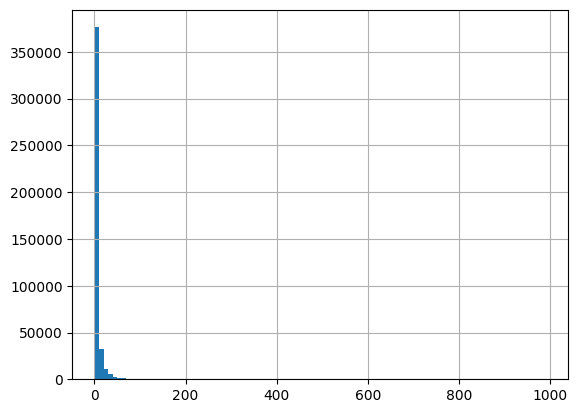

In [15]:
df_group['value'].hist(bins = 100)
plt.show()

[]

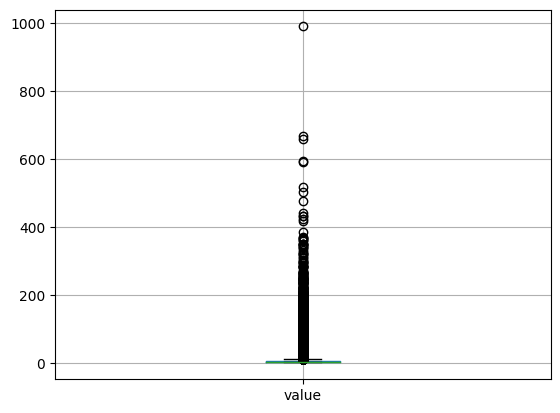

In [16]:
b_plot = df_group.boxplot(column = 'value')
b_plot.plot()

In [17]:
df_group['value'].sort_index().value_counts()

,count
value,
1,179810
2,68041
3,37968
4,25128
5,18026
...,...
235,1
991,1
299,1


In [18]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,66
1,1 Ave & E 110 St,1 Ave & E 62 St,1
2,1 Ave & E 110 St,1 Ave & E 68 St,4
3,1 Ave & E 110 St,1 Ave & E 78 St,5
4,1 Ave & E 110 St,1 Ave & E 94 St,19


In [19]:
df_group.rename(columns = {'value': 'trips'}, inplace = True)

In [20]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,member_casual,date,avgTemp,value,bike_rides_daily,merge_flag,trip_duration,trip_duration_minutes,month,season
0,3,39DBCC00E8BCCFCF,classic_bike,2022-01-01 22:40:32.125,2022-01-01 22:46:53.380,8 Ave & W 27 St,6297.07,E 31 St & 3 Ave,6239.08,40.747968,...,member,2022-01-01,11.6,1,20198,both,381.255,6.354250,1,winter
1,7,C1ECD31E3C4B6312,classic_bike,2022-01-01 12:35:12.376,2022-01-01 12:48:13.451,W 20 St & 10 Ave,6306.01,West St & Chambers St,5329.03,40.745686,...,casual,2022-01-01,11.6,1,20198,both,781.075,13.017917,1,winter
2,25,C73FD0256210B781,classic_bike,2022-01-01 16:49:29.693,2022-01-01 17:08:12.443,Park Ave & E 162 St,8016.07,Park Ave & E 162 St,8016.07,40.825716,...,member,2022-01-01,11.6,1,20198,both,1122.750,18.712500,1,winter
3,44,C5465D2588FB7553,classic_bike,2022-01-01 16:02:10.215,2022-01-01 16:11:09.256,E 11 St & Avenue B,5659.11,2 Ave & E 31 St,6197.02,40.727464,...,casual,2022-01-01,11.6,1,20198,both,539.041,8.984017,1,winter
4,58,1840979DF0C78D6B,classic_bike,2022-01-01 15:42:47.406,2022-01-01 15:51:06.549,E 11 St & 1 Ave,5746.14,E 27 St & 1 Ave,6004.06,40.729538,...,member,2022-01-01,11.6,1,20198,both,499.143,8.319050,1,winter


In [21]:
df_station= df[['start_station_name','end_station_name','start_lat','end_lat','start_lng','end_lng']]

In [35]:
df_station = df_station.drop_duplicates(subset = ['start_station_name','end_station_name'])


In [50]:
df_plot= df_station.merge(df_group, on = ['start_station_name','end_station_name'])

In [51]:
df_plot

,start_station_name,end_station_name,start_lat,end_lat,start_lng,end_lng,trips
0,8 Ave & W 27 St,E 31 St & 3 Ave,40.747968,40.743943,-73.996637,-73.979661,16
1,W 20 St & 10 Ave,West St & Chambers St,40.745686,40.717548,-74.005141,-74.013221,72
2,Park Ave & E 162 St,Park Ave & E 162 St,40.825716,40.825716,-73.915585,-73.915585,17
3,E 11 St & Avenue B,2 Ave & E 31 St,40.727464,40.742909,-73.979504,-73.977061,6
4,E 11 St & 1 Ave,E 27 St & 1 Ave,40.729538,40.739445,-73.984267,-73.976806,49
...,...,...,...,...,...,...,...
431192,Front St & Gold St,E 40 St & Park Ave,40.702271,40.750756,-73.982655,-73.978326,1
431193,Greene St & Prince St,2 Ave & E 99 St,40.725117,40.786259,-73.999305,-73.945526,1
431194,Willoughby Ave & Tompkins Ave,Knickerbocker Ave & Hancock St,40.694307,40.693850,-73.946422,-73.909740,1
431195,3 Ave & E 62 St,W 20 St & 8 Ave,40.763155,40.743453,-73.965882,-74.000040,1


In [38]:
import gc # this is garbage collector - speeds up performance
gc.collect()


132

In [52]:

df_plot.head()

,start_station_name,end_station_name,start_lat,end_lat,start_lng,end_lng,trips
0,8 Ave & W 27 St,E 31 St & 3 Ave,40.747968,40.743943,-73.996637,-73.979661,16
1,W 20 St & 10 Ave,West St & Chambers St,40.745686,40.717548,-74.005141,-74.013221,72
2,Park Ave & E 162 St,Park Ave & E 162 St,40.825716,40.825716,-73.915585,-73.915585,17
3,E 11 St & Avenue B,2 Ave & E 31 St,40.727464,40.742909,-73.979504,-73.977061,6
4,E 11 St & 1 Ave,E 27 St & 1 Ave,40.729538,40.739445,-73.984267,-73.976806,49


In [39]:
### Plot The Map

In [53]:
df_plot = df_plot.nlargest(n = 1000,columns = 'trips')

In [59]:
df_plot.to_csv('/content/drive/MyDrive/2.5 Task/df_final_locations_for_map.csv')

In [42]:
from google.colab import output
output.enable_custom_widget_manager()

In [55]:
# Create KeplerGl instance

m = KeplerGl(height = 700, data={"data_1": df_plot})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':                                   start_station_name  \
4473                         …

##### Source points are set to yellow, representing the starting locations, target points are blue, showing the ending locations. Color contrast helps visually distinguishing betwen the origin destination of trips, improving readability.
##### Arcs are drawn from the start and end points and represent bike routs, this visualization offers a clear depiction of the bike flow between locations. showing which areas are connected by frequent trips.


##### The filtered map shows that bike activity is thriving around Central Park, NYU, and Lower Manhattan! Central Park is a go-to spot for leisure, while Lower Manhattan serves commuters. Manhattan's bike infrastructure is the main focus, with fewer riders in Jersey City and the outer boroughs. Filtering for trips with at least 102 occurrences highlights the city's favourite biking routes!

In [60]:
import json
with open("/content/drive/MyDrive/2.5 Task/config.json", "w") as outfile:
    json.dump(config, outfile)

In [61]:
m.save_to_html(file_name='/content/drive/MyDrive/2.5 Task/Citi Bike Trips Aggregated.html', read_only = False, config = config)

Map saved to /content/drive/MyDrive/2.5 Task/Citi Bike Trips Aggregated.html!
